In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0-dev20200315
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
pandas 1.0.3
sklearn 0.22.2.post1
tensorflow 2.2.0-dev20200315
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data( )
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


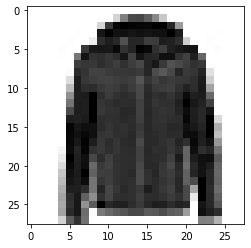

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
show_single_image(x_train[0])

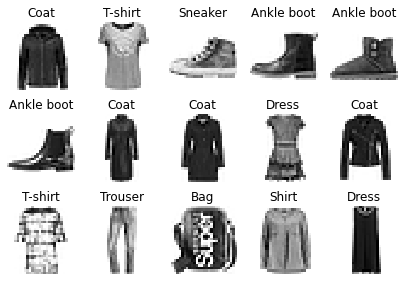

In [4]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows*n_cols < len(x_data)
    plt.figure(figsize = (n_cols*1.4, n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap='binary', interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
              'Coat', 'Sandal', 'Shirt', 'Sneaker',
              'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [5]:
# tf.keras.Sequential()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# softmax: 将向量变成概率分布，x=[x1, x2, x3]
#           y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 +e^x2 +e^x3
# sparse: y-->index, y-->one_hot-->[]   
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = 'adam',
             metrics = ['accuracy'])

In [6]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# [None, 784] *w +b-->[None, 300] w.shape为[784, 300], b=300 计算量：784*300+300

In [11]:
history= model.fit(x_train, y_train, epochs=10, 
                  validation_data = (x_valid, y_valid))
# 使用history接收可以打印中间的一些变量的值

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1713/1719 [============================>.] - ETA: 0s - loss: 2.1501 - accuracy: 0.7147WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000029D56A68840> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and at

In [12]:
type(history)

tensorflow.python.keras.callbacks.History

In [13]:
history.history

{'loss': [2.1447815895080566,
  0.6108035445213318,
  0.5513281226158142,
  0.4841499328613281,
  0.4487115740776062,
  0.4277269244194031,
  0.3967200219631195,
  0.3754926919937134,
  0.3681694567203522,
  0.3598444163799286],
 'accuracy': [0.7148181796073914,
  0.7811272740364075,
  0.8051999807357788,
  0.8268181681632996,
  0.8387091159820557,
  0.848872721195221,
  0.8568909168243408,
  0.8643636107444763,
  0.8671818375587463,
  0.8704909086227417],
 'val_loss': [0.6466305255889893,
  0.5802789330482483,
  0.5601136088371277,
  0.4417009651660919,
  0.3874777555465698,
  0.4218235909938812,
  0.423613578081131,
  0.40597665309906006,
  0.3792668581008911,
  0.3807485103607178],
 'val_accuracy': [0.7613999843597412,
  0.7888000011444092,
  0.8083999752998352,
  0.849399983882904,
  0.8655999898910522,
  0.8618000149726868,
  0.8425999879837036,
  0.8569999933242798,
  0.871999979019165,
  0.8727999925613403]}

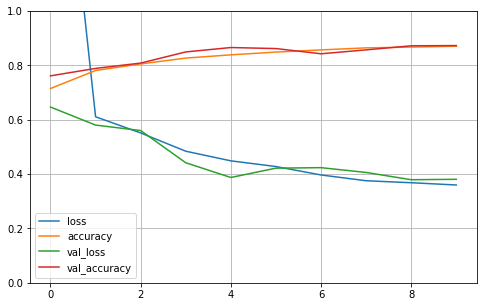

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1) # 显示坐标轴的范围
    plt.show()

plot_learning_curves(history)

In [ ]:
# 构建模型2
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers,Dense(10, activation='softmax')
])